In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [48]:
df = pd.read_csv('/Users/shivendragupta/Desktop/Deep Learning/ANN/Churn_Modelling.csv')

In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df = df.drop(columns = ['RowNumber','CustomerId','Surname'])

In [51]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [52]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [57]:
X = df.drop(columns=['Exited'])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [60]:
y = df.iloc[:,8]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=43)


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [79]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
model_e = model.fit(X_train_trf,y_train,validation_split=.2,epochs=100,verbose=True)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7934 - loss: 0.5286 - val_accuracy: 0.7994 - val_loss: 0.4920
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7894 - loss: 0.5013 - val_accuracy: 0.7994 - val_loss: 0.4742
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.7931 - loss: 0.4759 - val_accuracy: 0.7994 - val_loss: 0.4528
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.7908 - loss: 0.4563 - val_accuracy: 0.7994 - val_loss: 0.4357
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7970 - loss: 0.4361 - val_accuracy: 0.8062 - val_loss: 0.4258
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8079 - loss: 0.4252 - val_accuracy: 0.8156 - val_loss: 0.4215
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8131 - loss: 0.4203 - val_accuracy: 0.8144 - val_loss: 0.4191
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8130 - loss: 0

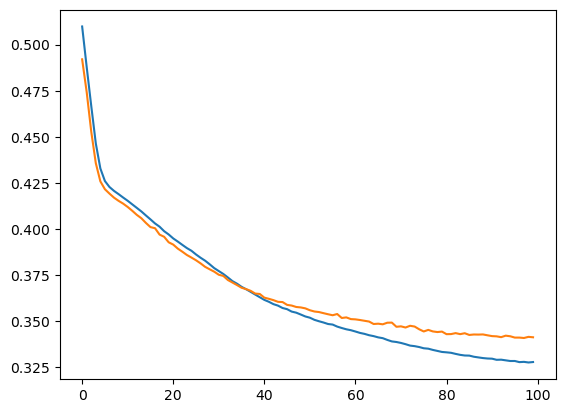

In [83]:
import matplotlib.pyplot as plt
plt.plot(model_e.history['loss'])
plt.plot(model_e.history['val_loss'])


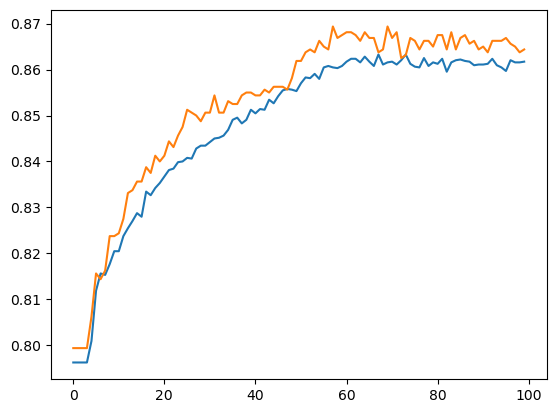

In [84]:
plt.plot(model_e.history['accuracy'])
plt.plot(model_e.history['val_accuracy'])